# Grade: /100 points

# Lab Assignment 01: Supervised learning, Linear models, and Loss functions

In this Lab assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


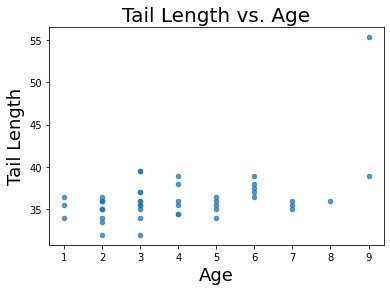

In [2]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)
possum_data.plot.scatter(x = 'age', y = 'tailL', alpha = 0.75)
plt.ylabel("Tail Length", fontsize=18)
plt.xlabel("Age", fontsize=18)
plt.title('Tail Length vs. Age', fontsize=20)
plt.show()

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call you function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [3]:
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

In [4]:
def linearModelPredict(b,X):
    yp = X @ b
    return yp

What happens when b is a 2d-array?

If b is a 2d-array, yp will be a 2d-array as well.

In [5]:
# Always important: Test the new function you have written! 
yp = linearModelPredict(b,X)
yp

array([ 0.1, -0.2,  0.7])

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 
Written answer: To minimize the cost do you need increase or decrease the value of the parameters? 

In [6]:
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

In [7]:
def linearModelLoss(b, X, y):
    yp = (np.dot(X,b))
    rss = np.sum(np.square(y - yp))
    gradient = -2 * ((y - yp) @ X)
    return (rss, gradient)

In [8]:
rss, gradient = linearModelLoss(b, X, y)
print("RSS: " + str(rss))
print("Gradient: " + str(gradient))

RSS: 2.06
Gradient: [-3.6 -4. ]


Written answer: 
Since our goal is to minimize the value of out cost function, and our gradient is negative, we can increase $\theta_0$ and $\theta_1$ to approach: 

dg($\theta$) / d$\theta$ = 0

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2. 


In [9]:
def linearModelFit(X,y,lossfcn):
    n = X.shape[1]
    b = np.zeros((n))
    
    # Minimizing the loss function, given the arguments (X,y)
    # jac = True, because loss function is assumed to return a tuple
    RES = so.minimize(lossfcn,b,args=(X,y),jac=True)
    
    b = RES.x
    
    # calculating R2
    TSS = np.sum(np.square(y-np.mean(y)))
    RSS = linearModelLoss(b,X,y)[0]
    R2 = 1-RSS/TSS 
    return (b,R2)

In [10]:
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])

In [11]:
b, R2 = linearModelFit(X, y, linearModelLoss)
print(b)
print(R2)

[0.6 0.6]
0.75


In [12]:
yp = (np.dot(X,b))
yp

array([0.6, 0. , 1.8])

In [13]:
Xplot = np.array([0,-1,2]) # removing the colomn of 1s to graph X points

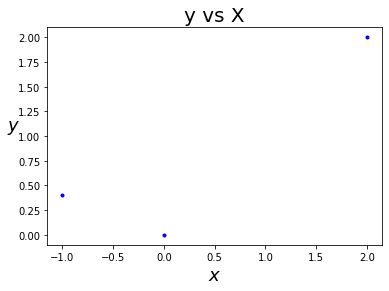

In [14]:
plt.plot(Xplot, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("y vs X", fontsize=20)
plt.show()

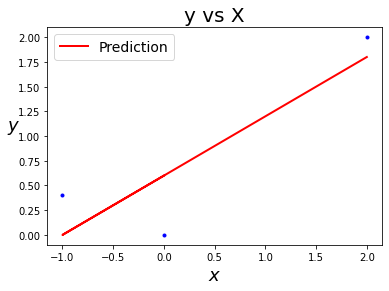

In [15]:
#plot this model’s predictions
plt.plot(Xplot, yp, "r-", linewidth=2, label="Prediction")
plt.plot(Xplot, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("y vs X", fontsize=20)
plt.show()

This looks pretty good to me

### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. 



In [16]:
y = possum_data.tailL.to_numpy()

In [17]:
possumAges = possum_data.age.to_numpy()
X = np.c_[np.ones(y.size), possumAges]

In [18]:
# Call your fitting function
b,R2 = linearModelFit(X, y, linearModelLoss)

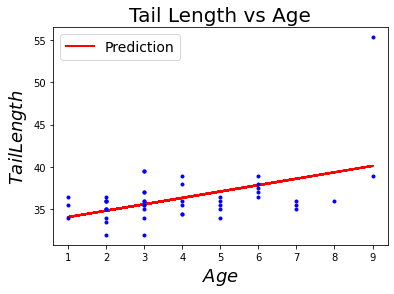

R2: 0.22286587947604086
b:[33.35046603  0.75372837]


In [19]:
yp = X @ b

# Plot line yp
plt.plot(possumAges, yp, "r-", linewidth=2, label="Prediction")
plt.plot(possumAges, y, "b.")
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$Tail Length$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Tail Length vs Age", fontsize=20)
plt.show()

# Report R2 
print("R2: " + str(R2))
print("b:" + str(b))

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 

In [20]:
def linearModelLossLAD(b,X,y):
    yp = (X @ b)
    residual = y - yp
    signRes = np.sign(residual); 
    ms = sum(abs(residual))
    gradient =- (signRes @ X)
    return (ms,gradient)

In [21]:
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

In [22]:
ms, gradient = linearModelLossLAD(b,X,y)

In [23]:
print("Sum of Magnitudes: " + str(ms))
print("Gradient: " + str(gradient))

Sum of Magnitudes: 2.0
Gradient: [-1. -1.]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, the code below will plot the fit.  The code will also print the R squared value on the plot.

Written answer: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



In [24]:
y = possum_data.tailL.to_numpy()

In [25]:
possumAges = possum_data.age.to_numpy()
X = np.c_[np.ones(y.size), possumAges]

In [26]:
# Call your fitting function
b,R2 = linearModelFit(X, y, linearModelLossLAD)

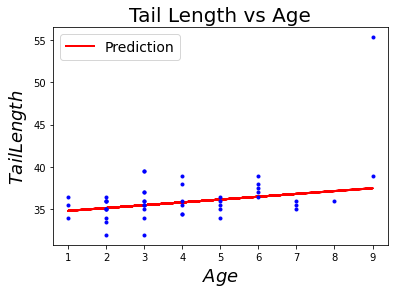

R2: 0.12937096211205001
b: [34.50470793  0.33291433]


In [27]:
yp = X @ b
# Add the line to the graph 
plt.plot(possumAges, yp, "r-", linewidth=2, label="Prediction")
plt.plot(possumAges, y, "b.")
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$Tail Length$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Tail Length vs Age", fontsize=20)
plt.show()

# Report R2 
print("R2: " + str(R2))
print("b: " + str(b))

Written Answer:

**What is the difference in the fit obtained with an L1 as compared to the L2 cost function?**

L1 resulting b: [33.35046603  0.75372837]

L1 resulting R2: 0.22286587947604086

L2 resulting b: [34.50470793  0.33291433]

L2 resulting R2: 0.12937096211205001

**Which one has a higher R2 value?**

L1 has the higher R2 value.

**Why?**

Because of the outlier in the data, which affects L1's yp more heavily

### Question 2.3: /15 points

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

In [28]:
# go over below function

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


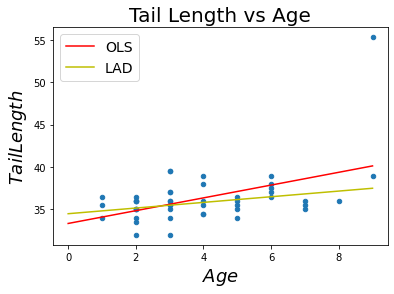

In [29]:
OLS = smf.ols('tailL~age', data = possum_data).fit()
LAD = smf.quantreg('tailL~age', data = possum_data).fit(q = 0.5)

possum_data.plot.scatter(x = 'age', y ='tailL')

age = np.linspace(0,9,101)
yp_ols = OLS.predict(exog = dict(age = age)).values
yp_lad = LAD.predict(exog = dict(age = age)).values

plt.plot(age, yp_ols, color = 'r', label = 'OLS')
plt.plot(age, yp_lad, color = 'y', label = 'LAD')
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$Tail Length$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Tail Length vs Age", fontsize=20)
plt.show()

In no more than two sentences, comment on the rsquared values from statsmodels and the rsquared values from your models. Are they similar?

The OLS 